In [4]:
# Loading data libs for data preprocessesing and I/O functions
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

# For visualizations
from matplotlib import pyplot as plt
#%matplotlib inline # to draw the plots immediately after the current cell
import seaborn as sns
# Imputation fills in the missing value with some number. The imputed value won't be exactly right in most cases, but it usually gives more accurate models than dropping the column entirely.
# Please note that you can also add the option "strategy" to your SimpleImputer class (default=’mean’):
from sklearn.impute import SimpleImputer

russianRealEstate2021Dataset = pd.read_csv('Russia_Real_Estate_2021_main.csv', sep=',')
russianRealEstate2021Dataset.head()

,date,price,level,levels,rooms,area,kitchen_area,geo_lat,geo_lon,building_type,object_type,postal_code,street_id,id_region,house_id
0,2021-12-31,6439970,17,24,3,77.59,0.0,47.25679,39.71233,0,2,344068.0,NaN,61,NaN
1,2021-12-31,2994720,6,24,-1,29.36,0.0,47.25679,39.71233,0,2,344068.0,NaN,61,NaN
2,2021-12-31,3971520,24,24,1,41.37,0.0,47.25679,39.71233,0,2,344068.0,NaN,61,NaN
3,2021-12-31,3910500,5,24,1,43.45,0.0,47.25679,39.71233,0,2,344068.0,NaN,61,NaN
4,2021-12-31,6956950,11,24,3,76.45,0.0,47.25679,39.71233,0,2,344068.0,NaN,61,NaN


In [5]:
russianRealEstate2021Dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1000 non-null   object 
 1   price          1000 non-null   int64  
 2   level          1000 non-null   int64  
 3   levels         1000 non-null   int64  
 4   rooms          1000 non-null   int64  
 5   area           1000 non-null   float64
 6   kitchen_area   1000 non-null   float64
 7   geo_lat        1000 non-null   float64
 8   geo_lon        1000 non-null   float64
 9   building_type  1000 non-null   int64  
 10  object_type    1000 non-null   int64  
 11  postal_code    1000 non-null   float64
 12  street_id      980 non-null    float64
 13  id_region      1000 non-null   int64  
 14  house_id       980 non-null    float64
dtypes: float64(7), int64(7), object(1)
memory usage: 117.3+ KB


In [6]:
russianRealEstate2021Dataset.describe()

,price,level,levels,rooms,area,kitchen_area,geo_lat,geo_lon,building_type,object_type,postal_code,street_id,id_region,house_id
count,1.000000e+03,1000.000000,1000.000000,1000.00000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,980.000000,1000.000000,9.800000e+02
mean,6.852901e+06,8.746000,15.455000,1.31700,47.118670,5.78521,55.387115,50.967503,0.621000,0.950000,368376.048500,328248.985714,59.995000,1.842803e+06
std,6.651414e+06,6.714355,8.144588,1.35068,24.589447,7.55821,3.491392,22.922050,1.357646,0.999249,207084.942359,119745.720838,20.550165,5.021406e+05
min,1.920000e+05,1.000000,1.000000,-1.00000,13.000000,-100.00000,43.409602,20.334543,0.000000,0.000000,101000.000000,117138.000000,1.000000,5.954140e+05
25%,3.500000e+06,3.000000,9.000000,1.00000,33.000000,0.00000,54.980369,32.164803,0.000000,0.000000,172796.000000,231243.250000,50.000000,1.428940e+06
50%,6.015000e+06,7.000000,16.000000,1.00000,40.000000,5.00000,55.904216,39.712330,0.000000,0.000000,344081.000000,334638.855072,66.000000,2.106500e+06
75%,9.211033e+06,13.000000,25.000000,2.00000,58.650000,10.00000,56.916466,65.398212,0.000000,2.000000,625019.000000,419730.147059,77.000000,2.127554e+06
max,1.461993e+08,26.000000,37.000000,6.00000,280.000000,42.00000,69.008835,135.084915,6.000000,2.000000,680022.000000,586278.000000,200.000000,2.832843e+06


In [7]:
#Removes duplicate rows based on all columns.
russianRealEstate2021Dataset.drop_duplicates()

,date,price,level,levels,rooms,area,kitchen_area,geo_lat,geo_lon,building_type,object_type,postal_code,street_id,id_region,house_id
0,2021-12-31,6439970,17,24,3,77.59,0.0,47.256790,39.712330,0,2,344068.0,NaN,61,NaN
1,2021-12-31,2994720,6,24,-1,29.36,0.0,47.256790,39.712330,0,2,344068.0,NaN,61,NaN
2,2021-12-31,3971520,24,24,1,41.37,0.0,47.256790,39.712330,0,2,344068.0,NaN,61,NaN
3,2021-12-31,3910500,5,24,1,43.45,0.0,47.256790,39.712330,0,2,344068.0,NaN,61,NaN
4,2021-12-31,6956950,11,24,3,76.45,0.0,47.256790,39.712330,0,2,344068.0,NaN,61,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2021-12-31,6350000,3,5,3,85.00,12.0,53.331843,83.783791,0,0,656043.0,556952.5,22,1.172190e+06
996,2021-12-31,6099000,4,9,3,65.00,0.0,56.041539,92.753133,0,0,660030.0,581436.0,24,8.570030e+05
997,2021-12-31,2490000,1,10,2,56.90,0.0,55.169949,61.519210,0,0,454079.0,274414.0,74,1.820769e+06
998,2021-12-31,850000,2,2,2,37.00,5.0,55.946206,43.088179,0,0,606101.0,190983.0,52,9.583290e+05


In [8]:
#Using existing values in the Russian Real Estate Dataset to fill the missing values
# To ignore any errors like - TypeError: Cannot interpolate with all object-dtype columns in the DataFrame. Try setting at least one column to a numeric dtype.
try:
    russianRealEstate2021Dataset.interpolate(method ='linear', limit_direction ='forward', inplace=True)
except ValueError:
    print("Please ignore this error!")
except TypeError:
    print("Please ignore this error!")

In [9]:
# Removing the house_id column, because it is of no use in our prediction
# del russianRealEstate2021Dataset['house_id'] #OR
russianRealEstate2021Dataset.drop('house_id', inplace=True, axis=1, errors='ignore')
russianRealEstate2021Dataset.drop('kitchen_area', inplace=True, axis=1, errors='ignore')
russianRealEstate2021Dataset.drop('street_id', inplace=True, axis=1, errors='ignore')
russianRealEstate2021Dataset.drop('id_region', inplace=True, axis=1, errors='ignore')

In [10]:
# Split the data into train and test
trainingData, testingData = train_test_split(russianRealEstate2021Dataset, test_size=0.2, random_state=1)
print("Training dataset size:", len(trainingData))
print("Test dataset size:", len(testingData))

Training dataset size: 800
Test dataset size: 200


Text(0.5, 1.0, 'Price vs Postal Code')

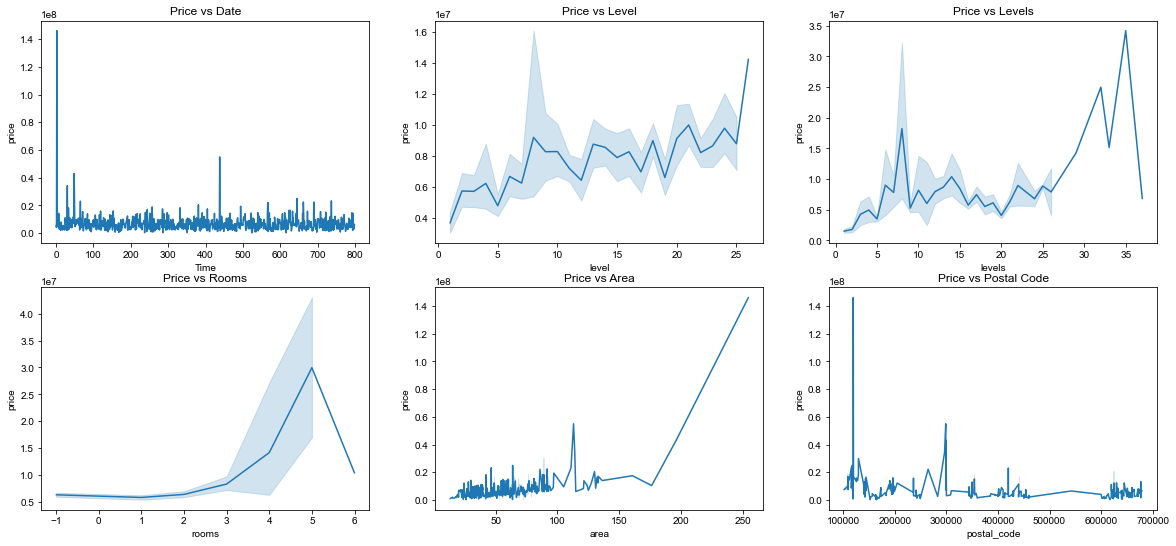

In [11]:
fig, ax = plt.subplots(2, 3, figsize=(20, 9))
ax = ax.flatten()
sns.set_theme(style="whitegrid", palette="pastel")
trainingData['Time'] = np.arange(len(trainingData.date))
sns.lineplot(data=trainingData, x="Time", y="price", ax=ax[0])
ax[0].set_title("Price vs Date")
sns.lineplot(data=trainingData, x="level", y="price", ax=ax[1])
ax[1].set_title("Price vs Level")
sns.lineplot(data=trainingData, x="levels", y="price", ax=ax[2])
ax[2].set_title("Price vs Levels")
sns.lineplot(data=trainingData, x="rooms", y="price", ax=ax[3])
ax[3].set_title("Price vs Rooms")
sns.lineplot(data=trainingData, x="area", y="price", ax=ax[4])
ax[4].set_title("Price vs Area")
sns.lineplot(data=trainingData, x="postal_code", y="price", ax=ax[5])
ax[5].set_title("Price vs Postal Code")

Text(0.5, 1.0, 'Price vs Object Type')

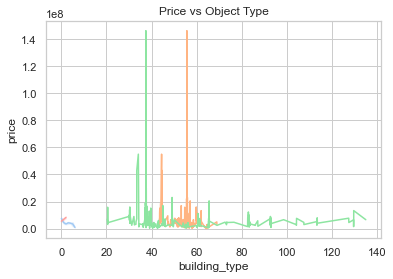

In [12]:
sns.lineplot(data=trainingData, x="building_type", y="price").set_title("Price vs Building Type")
sns.lineplot(data=trainingData, x="geo_lat", y="price").set_title("Price vs Latitude")
sns.lineplot(data=trainingData, x="geo_lon", y="price").set_title("Price vs Longitude")
sns.lineplot(data=trainingData, x="object_type", y="price").set_title("Price vs Object Type")

In [16]:
# set the spacing between subplots
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)
plt.show();
print("\nPreprocessing have been successfully done!")

<Figure size 432x288 with 0 Axes>


Preprocessing have been successfully done!
